## PROJECT CLUSTERING MODEL RFM

#### IMPORT PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler
import os
import warnings
warnings.filterwarnings("ignore")

#### READ DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data
path = '/content/drive/MyDrive/Colab Notebooks/Project_Mandiri/Data/'
data = path + 'Superstore_.csv'
df= pd.read_csv(data,encoding='latin1',sep=';')
df.head()

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,419.136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.582
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,68.714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,25.164


#### PROBLEM STATEMENT

Superstore ingin melakukan pengelompokkan pelanggan menjadi 3 kelompok, yaitu pelanggan silver,gold dan platinum.
ketiga pengelompokkan tersebut berhubungan dengan pemberian promo yang akan diberikan oleh superstore dengan mempertimbangkan tingkat pelanggan. semakin tinggi tingkatannya, semakin besar promonya.

### DATA PRE-PROCESSING




In [ ]:
#Melihat data
df.tail()

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,41.028
9990,9991,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.0,156.332
9991,9992,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,193.932
9992,9993,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6,4,0.0,13.32
9993,9994,CA-2017-119914,05/04/2017,05/09/2017,Second Class,CC-12220,Chris Cortes,Consumer,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


In [ ]:
#mengecek banyaknya row dan column
df.shape

(9994, 20)

In [ ]:
#melihat data type apakah sudah sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              9994 non-null   int64  
 1   ID_pesanan         9994 non-null   object 
 2   Tanggal_pesan      9994 non-null   object 
 3   Tanggal_kirim      9994 non-null   object 
 4   Metode_pengiriman  9994 non-null   object 
 5   ID_pelanggan       9994 non-null   object 
 6   Nama_pelanggan     9994 non-null   object 
 7   Segmen_pelanggan   9994 non-null   object 
 8   Kota               9994 non-null   object 
 9   Negara             9994 non-null   object 
 10  Kode_pos           9994 non-null   int64  
 11  Wilayah            9994 non-null   object 
 12  ID_produk          9994 non-null   object 
 13  Kategori           9994 non-null   object 
 14  Sub_kategori       9994 non-null   object 
 15  Nama_produk        9994 non-null   object 
 16  Penjualan          9994 

karena masih ada yang kurang sesuai tipe datanya maka akan di ganti.

In [ ]:
#convert numeric string column to float
df['Penjualan']=df['Penjualan'].apply(lambda x: float(x.split()[0].replace('.',"")))

df['Untung']=df['Untung'].apply(lambda x: float(x.split()[0].replace('.',"")))

Mau melihat apakah ada missing value dari tabel superstore. kenapa harus dicari karena nanti akan terganggunya pemrosesan

In [ ]:
#melihat missing value
df.isnull().sum()

Index                0
ID_pesanan           0
Tanggal_pesan        0
Tanggal_kirim        0
Metode_pengiriman    0
ID_pelanggan         0
Nama_pelanggan       0
Segmen_pelanggan     0
Kota                 0
Negara               0
Kode_pos             0
Wilayah              0
ID_produk            0
Kategori             0
Sub_kategori         0
Nama_produk          0
Penjualan            0
Kuantitas            0
Discount             0
Untung               0
dtype: int64

In [ ]:
#menghilangkan index untuk melihat apakah ada data yang duplicate
df_fil_clean = df.drop(['Index'], axis=1)
df_fil_clean.head()

,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
0,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196.0,2,0.00,419136.0
1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.00,219582.0
2,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.00,68714.0
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.0,5,0.45,-383031.0
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.20,25164.0


In [ ]:
#melihat apakah ada yang duplicate
df_fil_clean.duplicated().sum()

1

Terlihat bahwa ada duplicate 1 dari tabel dibawah

In [ ]:
df[df[["ID_pesanan","Nama_produk","Penjualan"]].duplicated(keep=False)].sort_values("Index")

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
3405,3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281372.0,2,0.3,-120588.0
3406,3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281372.0,2,0.3,-120588.0


lalu menghapus duplicatenya

In [ ]:
df = df.drop_duplicates(subset=["ID_pesanan","Nama_produk","Penjualan"]).reset_index()

lalu dicek apakah duplicatenya sudah terbuang. dari hasil dibawah sudah terbuang karena yang aslinya rownya 9994 berubah menjadi 9993.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              9993 non-null   int64  
 1   Index              9993 non-null   int64  
 2   ID_pesanan         9993 non-null   object 
 3   Tanggal_pesan      9993 non-null   object 
 4   Tanggal_kirim      9993 non-null   object 
 5   Metode_pengiriman  9993 non-null   object 
 6   ID_pelanggan       9993 non-null   object 
 7   Nama_pelanggan     9993 non-null   object 
 8   Segmen_pelanggan   9993 non-null   object 
 9   Kota               9993 non-null   object 
 10  Negara             9993 non-null   object 
 11  Kode_pos           9993 non-null   int64  
 12  Wilayah            9993 non-null   object 
 13  ID_produk          9993 non-null   object 
 14  Kategori           9993 non-null   object 
 15  Sub_kategori       9993 non-null   object 
 16  Nama_produk        9993 

In [ ]:
#melihat apakah ada nilai yang tidak wajar
df.describe()

,index,Index,Kode_pos,Penjualan,Kuantitas,Discount,Untung
count,9993.000000,9993.000000,9993.000000,9.993000e+03,9993.000000,9993.000000,9.993000e+03
mean,4996.659161,4997.659161,55191.576403,1.132103e+05,3.789753,0.156188,1.801258e+05
std,2885.264122,2885.264122,32065.074478,5.186444e+05,2.225149,0.206457,1.723054e+06
min,0.000000,1.000000,1040.000000,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,2498.000000,2499.000000,23223.000000,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,4997.000000,4998.000000,56560.000000,1.108800e+04,3.000000,0.200000,3.632200e+04
75%,7495.000000,7496.000000,90008.000000,5.399100e+04,5.000000,0.200000,1.509840e+05
max,9993.000000,9994.000000,99301.000000,2.396266e+07,14.000000,0.800000,6.719981e+07


Mengecek outlier dari kolom penjualan. karena kolom yang akan dipakai untuk clustering adalah penjualan. kenapa mengecek outlier karena hal ini akan mengganggu saat melakukan clustering

Text(0.5, 0, 'Penjualan')

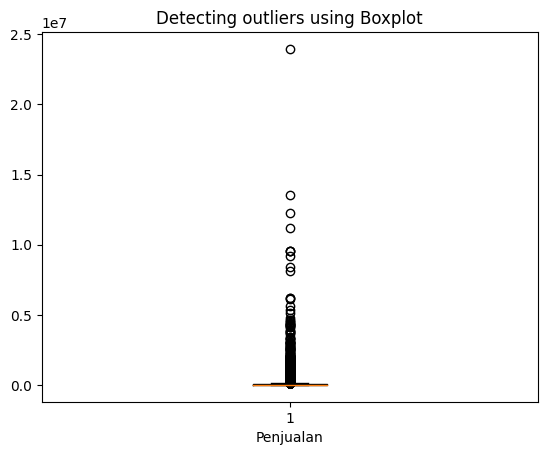

In [ ]:
# Deteksi dengan boxplot
plt.boxplot(list(df.Penjualan), vert=True)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Penjualan')

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(df):
    outliers = []
    df = sorted(df)
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in df:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [ ]:
# Deteksi outlier dengan IQR
outliers = detect_outliers_iqr(list(df.Penjualan))
print("Outliers Penjualan from IQR method: ", outliers)
print("Banyaknya outlier: ",len(outliers))

Outliers Penjualan from IQR method:  [131376.0, 131904.0, 131904.0, 131996.0, 132224.0, 132293.0, 132576.0, 132576.0, 132585.0, 132585.0, 132585.0, 132696.0, 133472.0, 133568.0, 133644.0, 134272.0, 134288.0, 134376.0, 134752.0, 134985.0, 134991.0, 135012.0, 135516.0, 135882.0, 135984.0, 135996.0, 136396.0, 136396.0, 136464.0, 136784.0, 136784.0, 137352.0, 137992.0, 138588.0, 139424.0, 139495.0, 139554.0, 139944.0, 139993.0, 139993.0, 139998.0, 140376.0, 140392.0, 140392.0, 140686.0, 140736.0, 140736.0, 140736.0, 141372.0, 141372.0, 141552.0, 141576.0, 142182.0, 142488.0, 142776.0, 142776.0, 143128.0, 143432.0, 143728.0, 143856.0, 143856.0, 143928.0, 143952.0, 143952.0, 143976.0, 143976.0, 143982.0, 143992.0, 144396.0, 144765.0, 144784.0, 144882.0, 145449.0, 145544.0, 145568.0, 145764.0, 145764.0, 145764.0, 145865.0, 146136.0, 146176.0, 146352.0, 146352.0, 146352.0, 146352.0, 146544.0, 146688.0, 146688.0, 146952.0, 147168.0, 147184.0, 147184.0, 147184.0, 147184.0, 147196.0, 147568.0, 14

In [ ]:
# Deleting
tr = []
for j in list(df.Penjualan):
    f = j in outliers
    if f is False:
        tr.append(j)

####EDA

Dalam pengembangan bisnis informasi sangat penting untuk mengetahui pola pelanggan oleh karena itu disini akan mengeksplore data untuk melihat data apa saja yang bisa didapat dan digunakan untuk pengembangan dalam bisnis

pertama akan mengecek pola dari discount yang dibeli oleh pembeli

<Axes: >

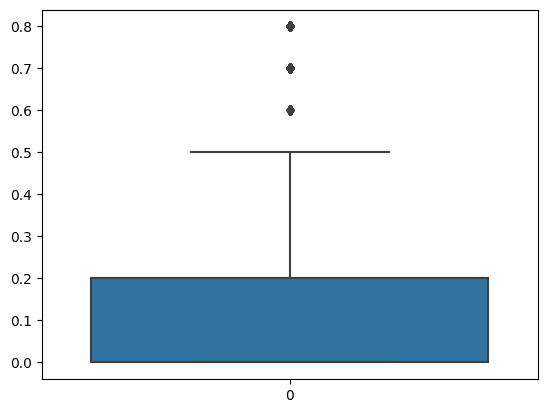

In [ ]:
# mengetahui persebaran discount
sns.boxplot(df['Discount'])

In [ ]:
#melihat negara tertinggi yang melakukan pembelian
n = df.groupby(df['Negara']).count()['Index']
n.sort_values(ascending=False)

Negara
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     468
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada 

In [ ]:
custom_aggregation = {}
custom_aggregation['Index']='count'
data2=df.groupby("Negara").agg(custom_aggregation)

data2.columns = ["Count"]
data2["Negara"] = data2.index

fig = px.bar(data2, x="Negara",y="Count",color="Negara",title="Negara terbanyak yang melakukan pembelian")

fig.show()

In [ ]:
#melihat kota tertinggi yang melakukan pembelian
k = df.groupby(df['Kota']).count()['Index']
k.sort_values(ascending=False)

Kota
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Redwood City       1
Holyoke            1
Redding            1
Iowa City          1
Aberdeen           1
Name: Index, Length: 531, dtype: int64

lalu melihat pola penjualan,kuantitas dan discount

In [ ]:
max_jual = df["Penjualan"].max()
print('Penjualan Maksimal = ',max_jual)

min_jual= df["Penjualan"].min()
print('Penjualan minimal = ',min_jual)

kuantitas_maks = df["Kuantitas"].max()
print('kuantitas maksimal = ',kuantitas_maks)

kuantitas_min = df["Kuantitas"].min()
print('kuantitas minimal = ',kuantitas_min)

Disc_max = df["Discount"].max()
print('Discount tertinggi = ',Disc_max)

Disc_min = df["Discount"].min()
print('Discount terendah = ',Disc_min)

Penjualan Maksimal =  23962656.0
Penjualan minimal =  3.0
kuantitas maksimal =  14
kuantitas minimal =  1
Discount tertinggi =  0.8
Discount terendah =  0.0


In [ ]:
#melihat kategori apa yang sering dibeli
kategori = df.groupby(df['Kategori']).count()['Index']
kategori.sort_values(ascending=False)

Kategori
Office Supplies    6026
Furniture          2120
Technology         1847
Name: Index, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation['Index']='count'
data2=df.groupby("Kategori").agg(custom_aggregation)

data2.columns = ["Count"]
data2["Kategori"] = data2.index

fig = px.bar(data2, x="Kategori",y="Count",color="Kategori",title="Kategori yang paling sering dibeli")

fig.show()

In [ ]:
#melihat metode pengiriman yang paling sering digunakan
metode_pengiriman = df.groupby(df['Metode_pengiriman']).count()['Index']
metode_pengiriman.sort_values(ascending=False)

Metode_pengiriman
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Index, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation['Index']='count'
data2=df.groupby("Metode_pengiriman").agg(custom_aggregation)

data2.columns = ["Count"]
data2["Metode_pengiriman"] = data2.index

fig = px.bar(data2, x="Metode_pengiriman",y="Count",color="Metode_pengiriman",title="Metode pengiriman")

fig.show()

In [ ]:
#melihat menurut segmen pelanggan yang paling sering beli
segmen = df.groupby(df['Segmen_pelanggan']).count()['Index']
segmen.sort_values(ascending=False)

Segmen_pelanggan
Consumer       5191
Corporate      3020
Home Office    1782
Name: Index, dtype: int64

In [ ]:
#melihat sub kategori apa yang sering dibeli
s_kategori = df.groupby(df['Sub_kategori']).count()['Index']
s_kategori.sort_values(ascending=False)

Sub_kategori
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Index, dtype: int64

In [ ]:
custom_aggregation = {}
custom_aggregation['Index']='count'
data2=df.groupby("Sub_kategori").agg(custom_aggregation)

data2.columns = ["Count"]
data2["Sub_kategori"] = data2.index

fig = px.bar(data2, x="Sub_kategori",y="Count",color="Sub_kategori",title="sub kategori")

fig.show()

<Axes: xlabel='Wilayah', ylabel='count'>

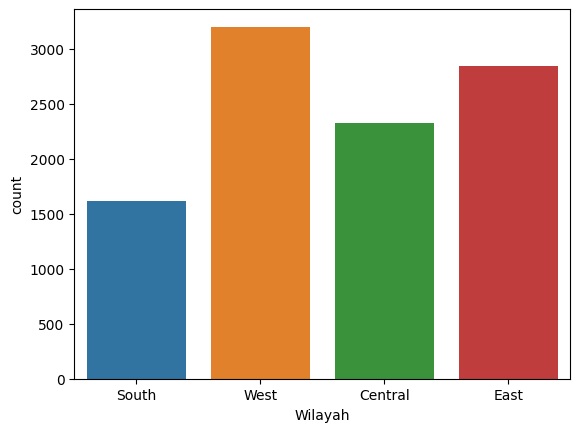

In [ ]:
#Melihat banyaknya yang beli dari setiap wilayah
sns.countplot(x=df['Wilayah'], data= df)

In [ ]:
#produk yang paling sering dibeli
produk = df.groupby(df['Nama_produk']).count()['Index']
produk.sort_values(ascending=False)

Nama_produk
Staple envelope                                                              48
Staples                                                                      46
Easy-staple paper                                                            46
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      19
                                                                             ..
Xerox 1922                                                                    1
4009 Highlighters                                                             1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection     1
Brother MFC-9340CDW LED All-In-One Printer, Copier Scanner                    1
Cisco SPA 501G IP Phone                                                       1
Name: Index, Length: 1850, dtype: int64

In [ ]:
df['Pelanggan_Barang']=df.groupby('ID_pelanggan')['Kuantitas'].transform('sum')
df.head()

,index,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,...,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Pelanggan_Barang
0,0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196.0,2,0.00,419136.0,14
1,1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.00,219582.0,14
2,2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.00,68714.0,28
3,3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.0,5,0.45,-383031.0,52
4,4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.20,25164.0,52


In [ ]:
#total penjualan yang dibeli oleh tiap pelanggan
df['Totalpenjualan_pelanggan']=df.groupby('ID_pelanggan')['Penjualan'].transform('sum')
df.head()

,index,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,...,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Pelanggan_Barang,Totalpenjualan_pelanggan
0,0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196.0,2,0.00,419136.0,14,237926.0
1,1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.00,219582.0,14,237926.0
2,2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.00,68714.0,28,1066374.0
3,3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.0,5,0.45,-383031.0,52,10279823.0
4,4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.20,25164.0,52,10279823.0


Melihat info total penjualan tiap pelanggan

In [ ]:
df['Totalpenjualan_pelanggan'].describe()

count    9.993000e+03
mean     1.766104e+06
std      2.127194e+06
min      1.652000e+03
25%      5.550390e+05
50%      1.164840e+06
75%      2.118507e+06
max      2.490601e+07
Name: Totalpenjualan_pelanggan, dtype: float64

Melihat info banyaknya barang yang dibeli tiap pelanggan

In [ ]:
df['Pelanggan_Barang'].describe()

count    9993.000000
mean       59.428000
std        26.591313
min         2.000000
25%        40.000000
50%        56.000000
75%        75.000000
max       150.000000
Name: Pelanggan_Barang, dtype: float64

membuat kolom baru dikarenakan kolom sebelumnya belum sesuai datatypenya. sehingga akan kita buat kolom baru dengan sesuai.

In [ ]:
#membuat kolom baru dengan type datanya menjadi date
df['Tanggal_pesan(new)'] = pd.DatetimeIndex(df.Tanggal_pesan).date

In [ ]:
#membuat kolom baru dengan type datanya menjadi date
df['Tanggal_kirim(new)'] = pd.DatetimeIndex(df.Tanggal_kirim).date

In [ ]:
#tanggal maksimum data
df['Tanggal_pesan(new)'].max()

datetime.date(2017, 12, 30)

In [ ]:
#tanggal maksimum data
df['Tanggal_kirim(new)'].max()

datetime.date(2018, 1, 5)

lalu buat data saat ini datetimenya

In [ ]:
#ambil data paling terakhir transaksi
import datetime as dt
now = dt.date(2017,12,30)

In [ ]:
df['Status_pesanan']=np.where(df['Tanggal_pesan(new)'].isna(),'Belum Selesai', 'Sudah Selesai')
df.tail()

,index,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,...,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Pelanggan_Barang,Totalpenjualan_pelanggan,Tanggal_pesan(new),Tanggal_kirim(new),Status_pesanan
9988,9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,...,Ultra Door Pull Handle,25248.0,3,0.2,41028.0,55,1070809.0,2014-01-21,2014-01-23,Sudah Selesai
9989,9990,9991,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,9196.0,2,0.0,156332.0,48,1655318.0,2017-02-26,2017-03-03,Sudah Selesai
9990,9991,9992,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,...,Aastra 57i VoIP phone,258576.0,2,0.2,193932.0,48,1655318.0,2017-02-26,2017-03-03,Sudah Selesai
9991,9992,9993,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,...,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",296.0,4,0.0,1332.0,48,1655318.0,2017-02-26,2017-03-03,Sudah Selesai
9992,9993,9994,CA-2017-119914,05/04/2017,05/09/2017,Second Class,CC-12220,Chris Cortes,Consumer,Westminster,...,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",24316.0,2,0.0,72948.0,81,1536392.0,2017-05-04,2017-05-09,Sudah Selesai


Mengecek banyaknya produk, transaksi, dan customer

In [ ]:
#melihat jumlah produk, jumlah transaksi, dan pelanggan
cust_x_prod = pd.DataFrame([{'products':len(df['ID_produk'].value_counts()),
                             'transactions':len(df['Index'].value_counts()),
                             'customers':len(df['ID_pelanggan'].value_counts())}],
                           columns=['products','transactions','customers'],index=['quantity'])
print(cust_x_prod)

          products  transactions  customers
quantity      1862          9993        793


In [ ]:
#Membuat kolom baru yang berisikan bulan ke berapa
df['month']=df['Tanggal_pesan(new)'].astype(str).str[5:7]
df.head()

,index,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,...,Penjualan,Kuantitas,Discount,Untung,Pelanggan_Barang,Totalpenjualan_pelanggan,Tanggal_pesan(new),Tanggal_kirim(new),Status_pesanan,month
0,0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,26196.0,2,0.00,419136.0,14,237926.0,2016-11-08,2016-11-11,Sudah Selesai,11
1,1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,73194.0,3,0.00,219582.0,14,237926.0,2016-11-08,2016-11-11,Sudah Selesai,11
2,2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,...,1462.0,2,0.00,68714.0,28,1066374.0,2016-06-12,2016-06-16,Sudah Selesai,06
3,3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,9575775.0,5,0.45,-383031.0,52,10279823.0,2015-10-11,2015-10-18,Sudah Selesai,10
4,4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,22368.0,2,0.20,25164.0,52,10279823.0,2015-10-11,2015-10-18,Sudah Selesai,10


In [ ]:
#Membuat kolom baru yang berisikan Total Penjualan
df['Total_Penjualan']=df['Penjualan']*df["Kuantitas"]

In [ ]:
#Membuat grafik total penjualan per bulan
import plotly.express as px
custom_aggregation = {}
custom_aggregation['Total_Penjualan']='sum'
data4=df.groupby("month").agg(custom_aggregation)

data4.columns = ["sum"]
data4["month"] = data4.index

fig = px.line(data4, x="month",y="sum",title="Total Penjualan Per Bulan")

fig.show()

#### FEATURE ENGINEERING

menggabungkan ID Pelanggan dengan tanggal pesan terakhir untuk mendapatkan kolom last purchase date. supaya ketemu nanti nilai recency nya.

In [ ]:
#Group by berdasarkan customer terakhir membeli

recency_df = df.groupby(['ID_pelanggan'],as_index=False)['Tanggal_pesan(new)'].max()
recency_df.columns = ['ID_pelanggan','LastPurchaseDate']
recency_df.head()

,ID_pelanggan,LastPurchaseDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2016-11-10


mencari recency nya dengan cara waktu now di kurangi last purchase date

In [ ]:
#hitung seberapa sering dia membeli dengan mengacu pada tanggal terbaru dalam beberapa hari

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,ID_pelanggan,LastPurchaseDate,Recency
0,AA-10315,2017-06-29,184
1,AA-10375,2017-12-11,19
2,AA-10480,2017-04-15,259
3,AA-10645,2017-11-05,55
4,AB-10015,2016-11-10,415


lalu cari frekuensinya dengan cara menghitung berapa kali pelanggan membeli dengan mengecek frekuensi ID Pelanggan sudah berapa kali transaksi

In [ ]:
#periksa frekuensi pelanggan berarti sudah berapa kali transaksi

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['ID_pelanggan','Index'], keep="first", inplace=True)
frequency_df = frequency_df.groupby('ID_pelanggan',as_index=False)['Index'].count()
frequency_df.columns = ['ID_pelanggan','Frequency']
frequency_df.head()

,ID_pelanggan,Frequency
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6


buat kolom baru dengan nama total cost. total cost dihasilkan melalui perkalian antara penjualan dan kuantitas. membuat kolom ini dipergunakan untuk mencari monetary

In [ ]:
df['Total_cost'] = df['Penjualan'] * df['Kuantitas']

untuk melihat nilai monetary atau jumlah pembelian yang dilakukan oleh tiap pelanggan, yaitu dengan cara menggabungkan penjumlahan total cost berdasarkan ID Pelanggan.

In [ ]:
monetary_df=df.groupby('ID_pelanggan',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['ID_pelanggan','Monetary']
monetary_df.head()

,ID_pelanggan,Monetary
0,AA-10315,14599360.0
1,AA-10375,406386.0
2,AA-10480,591384.0
3,AA-10645,8064067.0
4,AB-10015,265012.0


Lalu menggabugkan tabel recency, frequency dan monetary
pertama gabungkan tabel recency dan frequency dimana sebagai primary key dan foreign keynya adalah ID Pelanggan.

setelah didapat penggabungan tabel recency dan frequency. sekarang tabel itu digabungkan dengan tabel monetary dimana primary dan foreign keynya sama yaitu ID Pelanggan.

In [ ]:
#combine first recency and frequency
rf = recency_df.merge(frequency_df,left_on='ID_pelanggan',right_on='ID_pelanggan')

#combine rf frame with monetary values
rfm = rf.merge(monetary_df,left_on='ID_pelanggan',right_on='ID_pelanggan')
rfm.set_index('ID_pelanggan',inplace=True)
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
ID_pelanggan,,,,
AA-10315,2017-06-29,184,11,14599360.0
AA-10375,2017-12-11,19,15,406386.0
AA-10480,2017-04-15,259,12,591384.0
AA-10645,2017-11-05,55,18,8064067.0
AB-10015,2016-11-10,415,6,265012.0


Lalu kita akan membuang kolom lastpurchasedate yang didapatkan melalui recency tadi. supaya kolom tersebut hanya primary key dan RFM saja. untuk nanti membuat pemodelan

In [ ]:
rfm.drop(columns=['LastPurchaseDate'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,11,14599360.0
AA-10375,19,15,406386.0
AA-10480,259,12,591384.0
AA-10645,55,18,8064067.0
AB-10015,415,6,265012.0


#### MODELING

lakukan pemodelan dengan menggunakan nilai quantile tiap recency, frequency dan monetary.

alasan menggunakan quantile supaya nanti lebih mudah dalam membuat nilai skorenya

In [ ]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,30.0,8.0,1273280.0
0.50,75.0,12.0,3302482.0
0.75,183.0,16.0,7583999.0


lalu lakukan pemodelan skoring RFM dimana melalui model.
diketahui:
quantile 1 = 0.25
quantile 2 = 0.5
quantile 3 = 0.75

Tujuan yang diinginkan yaitu :

pemeringkatan dimana nilai yang kecil menunjukkan nilai yang baik
sebaliknya nilai yang besar menunjukkan nilai yang buruk.
intinya semakin kecil nilai RFM scores nya semakin bagus.
- skoring pada Recency :

nilai recency dibawah atau sama dengan nilai quantile 1 maka bernilai = **1**

nilai recency dibawah atau sama dengan nilai quantile 2 maka bernilai = **2**

nilai recency dibawah atau sama dengan nilai quantile 3 maka bernilai = **3**

nilai recency lebih dari quantile 3 maka bernilai = **4**

alasan memilih score tersebut pada recency, karena nilai recency yang sedikit atau rentang waktu pembelian terakhirnya dekat maka semakin bagus.
hal sebaliknya jika rentang waktu pembelian terakhirnya jauh maka semakin buruk.

- skoring pada Frequency dan Monetary :

nilai recency dibawah atau sama dengan nilai quantile 1 maka bernilai = **4**

nilai recency dibawah atau sama dengan nilai quantile 2 maka bernilai = **3**

nilai recency dibawah atau sama dengan nilai quantile 3 maka bernilai = **2**

nilai recency lebih dari quantile 3 maka bernilai = **1**

alasan memilih score tersebut pada frequency dan monetary.

frequency = karena nilai frequencynya banyak maka semakin sering melakukan pembelian, sehingga semakin sering melakukan pembelian scorenya semakin bagus. oleh karena itu nilai quantile lebih dari 3 memiliki score yang paling bagus.


monetary = karena nilai monetary banyak maka semakin banyak pengeluaran dari pembeli atau sama saja semakin tinggi monetary semakin menguntungkan penjual, sehingga semakin tinggi monetary scorenya semakin bagus. oleh karena itu nilai quantile lebih dari 3 memiliki score yang paling bagus.

In [ ]:
RFMScores= rfm.copy()
#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4
#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

              Recency  Frequency    Monetary  R  F  M RFMgroup  Score
ID_pelanggan                                                         
AA-10315          184         11  14599360.0  4  3  1      431      8
AA-10375           19         15    406386.0  1  2  4      124      7
AA-10480          259         12    591384.0  4  3  4      434     11
AA-10645           55         18   8064067.0  2  1  1      211      4
AB-10015          415          6    265012.0  4  4  4      444     12


Hasil RFM Scoring tujuannya tercapai yaitu semakin rendah score nilainya semakin bagus. hal sebaliknya semakin tinggi score nilainya semakin buruk

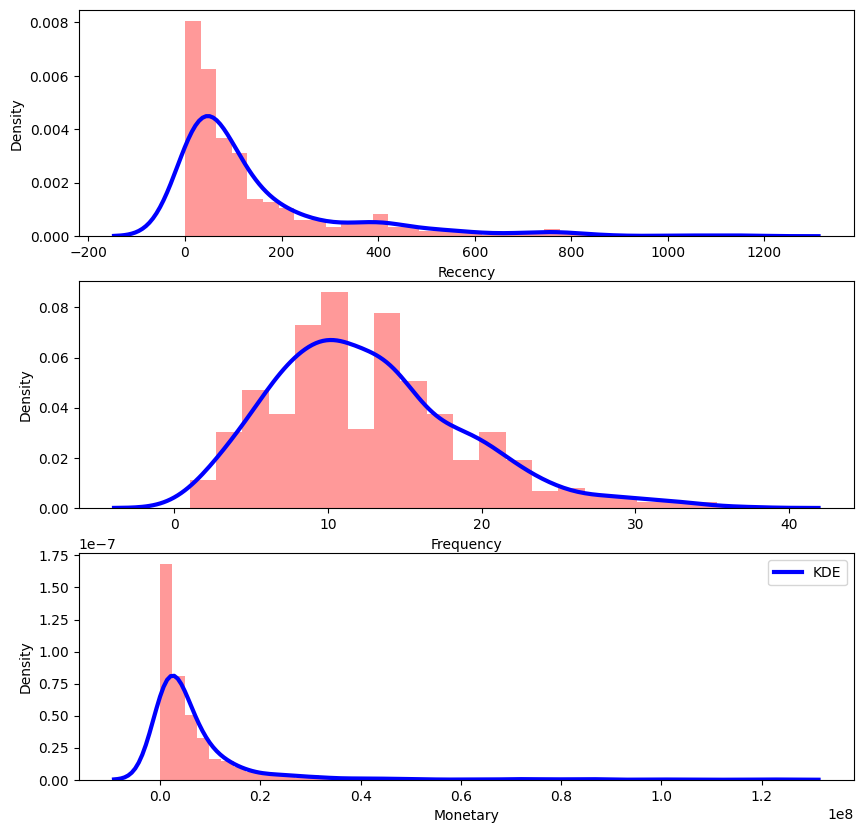

In [ ]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

In [ ]:
clustering_rfm = rfm[['Recency',"Frequency","Monetary"]].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,11,14599360.0
AA-10375,19,15,406386.0
AA-10480,259,12,591384.0
AA-10645,55,18,8064067.0
AB-10015,415,6,265012.0


Dengan melihat grafik distribusi RFM diatas nilai R,F,dan M nya tidak berdistribusi dengan normal. oleh karena itu untuk membuat grafiknya menjadi distribusi normal yaitu dengan menggunakan Scaler

In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)
data_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
data_scaled

,Recency,Frequency,Monetary
0,0.157940,0.277778,0.119478
1,0.016309,0.388889,0.003270
2,0.222318,0.305556,0.004785
3,0.047210,0.472222,0.065969
4,0.356223,0.138889,0.002113
...,...,...,...
788,0.036910,0.750000,0.036650
789,0.003433,0.194444,0.053548
790,0.007725,0.305556,0.241945
791,0.046352,0.833333,0.122629


setelah sudah berdistribusi normal. selanjutnya akan dicari jumlah cluster yang optimal.

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

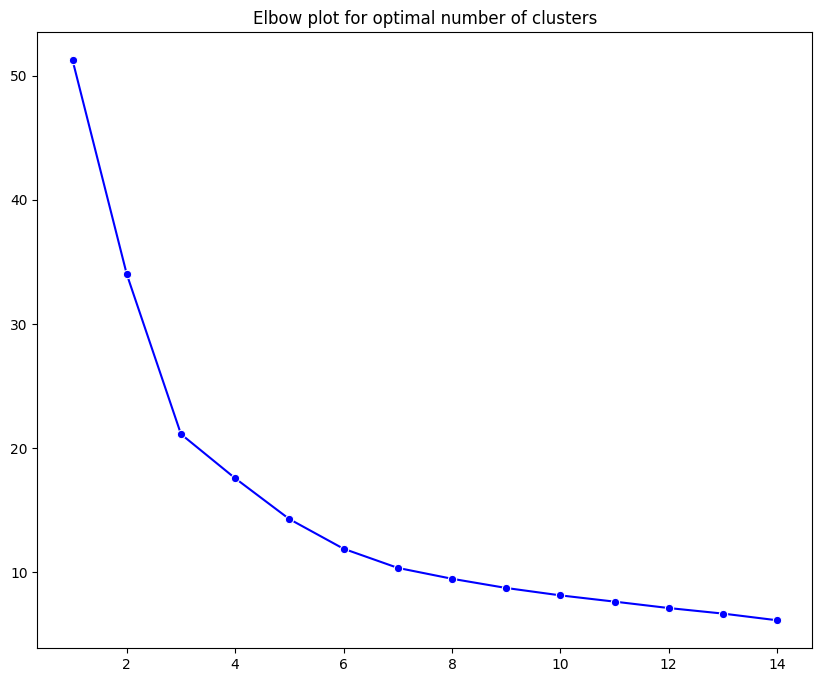

In [ ]:
#mencari number of cluster yang optimal menggunakan method elbow
wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

melalui hasil diatas didapatkan yang paling optimal menggunakan metode elbow adalah clusternya berjumlah 3. tapi melalui case ini memang harus dibagi 3 karena keinginan superstore harus terbagi 3 yaitu; silver,gold,platinum.

#### EVALUATION

Lalu kita evaluasi apakah sudah benar hasil dari metode elbow, dengan menggunakan silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
#mengecek menggunakan silhoutte_score untuk konfirmasi k-kluster
range_n_clusters = range(2,15)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(data_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_scaled, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3441953025226097
For n_clusters = 3, silhouette score is 0.4273663836412831
For n_clusters = 4, silhouette score is 0.3435991709015611
For n_clusters = 5, silhouette score is 0.34536578229503995
For n_clusters = 6, silhouette score is 0.36067812732846916
For n_clusters = 7, silhouette score is 0.334201618768489
For n_clusters = 8, silhouette score is 0.33821934248109536
For n_clusters = 9, silhouette score is 0.3019708686097917
For n_clusters = 10, silhouette score is 0.31529068930110865
For n_clusters = 11, silhouette score is 0.32352011243827633
For n_clusters = 12, silhouette score is 0.3198852601376435
For n_clusters = 13, silhouette score is 0.3196483870243608
For n_clusters = 14, silhouette score is 0.32458068313442795


Setelah dilihat scorenya ternyata sesuai melalui silhoutte score juga didapat 3 karena nilai scorenya paling tinggi.

Lalu selanjutnya akan kita lakukan pengklusteran menggunakan kmeans sebanyak 3

In [ ]:
#Clustering dengan mengunakan Kmeans.
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(data_scaled)
pred = kmeans.predict(data_scaled)
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
ID_pelanggan,,,,,,,,,
AA-10315,184,11,14599360.0,4,3,1,431,8,0
AA-10375,19,15,406386.0,1,2,4,124,7,0
AA-10480,259,12,591384.0,4,3,4,434,11,0
AA-10645,55,18,8064067.0,2,1,1,211,4,1
AB-10015,415,6,265012.0,4,4,4,444,12,2
AB-10060,54,18,20025042.0,2,1,1,211,4,1
AB-10105,41,20,18101654.0,2,1,1,211,4,1
AB-10150,41,12,1073633.0,2,3,4,234,9,0
AB-10165,25,14,1247309.0,1,2,4,124,7,0


In [ ]:
#Melihat hasil mean tiap cluster berdasarkan score dan RFM
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
2,532.330357,7.785714,4.678833e+06,4.000000,3.428571,2.973214,10.401786
0,86.276923,9.940659,4.367290e+06,2.312088,3.059341,2.742857,8.114286
1,77.597345,20.345133,1.336956e+07,2.101770,1.190265,1.783186,5.075221


#### EDA

In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
ID_pelanggan,,,,,,,,,
AA-10315,184,11,14599360.0,4,3,1,431,8,0
AA-10375,19,15,406386.0,1,2,4,124,7,0
AA-10480,259,12,591384.0,4,3,4,434,11,0
AA-10645,55,18,8064067.0,2,1,1,211,4,1
AB-10015,415,6,265012.0,4,4,4,444,12,2


In [ ]:
RFMScores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    793 non-null    int64  
 1   Frequency  793 non-null    int64  
 2   Monetary   793 non-null    float64
 3   R          793 non-null    int64  
 4   F          793 non-null    int64  
 5   M          793 non-null    int64  
 6   RFMgroup   793 non-null    object 
 7   Score      793 non-null    int64  
 8   Cluster    793 non-null    int32  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 58.9+ KB


In [ ]:
df1= df.copy()

In [ ]:
df1[df1[["ID_pelanggan"]].duplicated(keep=False)].sort_values("Index")

,index,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,...,Discount,Untung,Pelanggan_Barang,Totalpenjualan_pelanggan,Tanggal_pesan(new),Tanggal_kirim(new),Status_pesanan,month,Total_Penjualan,Total_cost
0,0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,0.00,419136.0,14,237926.0,2016-11-08,2016-11-11,Sudah Selesai,11,52392.0,52392.0
1,1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,0.00,219582.0,14,237926.0,2016-11-08,2016-11-11,Sudah Selesai,11,219582.0,219582.0
2,2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,...,0.00,68714.0,28,1066374.0,2016-06-12,2016-06-16,Sudah Selesai,06,2924.0,2924.0
3,3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,0.45,-383031.0,52,10279823.0,2015-10-11,2015-10-18,Sudah Selesai,10,47878875.0,47878875.0
4,4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,0.20,25164.0,52,10279823.0,2015-10-11,2015-10-18,Sudah Selesai,10,44736.0,44736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,...,0.20,41028.0,55,1070809.0,2014-01-21,2014-01-23,Sudah Selesai,01,75744.0,75744.0
9989,9990,9991,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,...,0.00,156332.0,48,1655318.0,2017-02-26,2017-03-03,Sudah Selesai,02,18392.0,18392.0
9990,9991,9992,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,...,0.20,193932.0,48,1655318.0,2017-02-26,2017-03-03,Sudah Selesai,02,517152.0,517152.0
9991,9992,9993,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,...,0.00,1332.0,48,1655318.0,2017-02-26,2017-03-03,Sudah Selesai,02,1184.0,1184.0


In [ ]:
#menghapus semua id pelanggan supaya tabelnya pas di merger sesuai
df1 = df1.drop_duplicates(subset=["ID_pelanggan"]).reset_index()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   level_0                   793 non-null    int64  
 1   index                     793 non-null    int64  
 2   Index                     793 non-null    int64  
 3   ID_pesanan                793 non-null    object 
 4   Tanggal_pesan             793 non-null    object 
 5   Tanggal_kirim             793 non-null    object 
 6   Metode_pengiriman         793 non-null    object 
 7   ID_pelanggan              793 non-null    object 
 8   Nama_pelanggan            793 non-null    object 
 9   Segmen_pelanggan          793 non-null    object 
 10  Kota                      793 non-null    object 
 11  Negara                    793 non-null    object 
 12  Kode_pos                  793 non-null    int64  
 13  Wilayah                   793 non-null    object 
 14  ID_produk 

In [ ]:
#menggabungkan tabel awal dengan rfmscores
dfscores = RFMScores.merge(df1,on='ID_pelanggan',how='left')
dfscores.head(10)

,ID_pelanggan,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster,...,Discount,Untung,Pelanggan_Barang,Totalpenjualan_pelanggan,Tanggal_pesan(new),Tanggal_kirim(new),Status_pesanan,month,Total_Penjualan,Total_cost
0,AA-10315,184,11,14599360.0,4,3,1,431,8,0,...,0.0,90735.0,30,5090484.0,2017-06-29,2017-07-04,Sudah Selesai,06,108882.0,108882.0
1,AA-10375,19,15,406386.0,1,2,4,124,7,0,...,0.2,14672.0,41,165678.0,2016-07-10,2016-07-16,Sudah Selesai,07,33536.0,33536.0
2,AA-10480,259,12,591384.0,4,3,4,434,11,0,...,0.2,54432.0,36,193048.0,2017-04-15,2017-04-20,Sudah Selesai,04,46656.0,46656.0
3,AA-10645,55,18,8064067.0,2,1,1,211,4,1,...,0.3,-48588.0,64,1737756.0,2014-06-22,2014-06-27,Sudah Selesai,06,510174.0,510174.0
4,AB-10015,415,6,265012.0,4,4,4,444,12,2,...,0.2,54801.0,13,143818.0,2014-03-07,2014-03-08,Sudah Selesai,03,48712.0,48712.0
5,AB-10060,54,18,20025042.0,2,1,1,211,4,1,...,0.0,23086.0,56,5110574.0,2016-09-01,2016-09-03,Sudah Selesai,09,679.0,679.0
6,AB-10105,41,20,18101654.0,2,1,1,211,4,1,...,0.5,-2044458.0,73,2898788.0,2016-09-25,2016-09-30,Sudah Selesai,09,1179495.0,1179495.0
7,AB-10150,41,12,1073633.0,2,3,4,234,9,0,...,0.0,395428.0,37,280163.0,2017-09-04,2017-09-08,Sudah Selesai,09,36784.0,36784.0
8,AB-10165,25,14,1247309.0,1,2,4,124,7,0,...,0.0,24936.0,48,397663.0,2015-03-28,2015-04-02,Sudah Selesai,03,16624.0,16624.0
9,AB-10255,166,14,1224054.0,3,2,4,324,9,0,...,0.4,-6435.0,39,583602.0,2017-06-02,2017-06-06,Sudah Selesai,06,297.0,297.0


In [ ]:
#Membuang kolom yang sekiranya tidak diperlukan dan kolom yang telah berantakan yang disebabkan penghapusan id pelanggan yang duplicate
dfscores = dfscores.drop(["Penjualan","Kuantitas","Tanggal_pesan(new)","Tanggal_kirim(new)","Tanggal_pesan","Tanggal_kirim",
                          "Status_pesanan","Discount","Total_cost","ID_produk","Nama_produk","Metode_pengiriman","ID_pesanan","Kategori","Sub_kategori",
                          "index","Untung","RFMgroup"], axis = 1)
dfscores.head()

,ID_pelanggan,Recency,Frequency,Monetary,R,F,M,Score,Cluster,level_0,...,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,Pelanggan_Barang,Totalpenjualan_pelanggan,month,Total_Penjualan
0,AA-10315,184,11,14599360.0,4,3,1,8,0,1159,...,Alex Avila,Consumer,Minneapolis,Minnesota,55407,Central,30,5090484.0,06,108882.0
1,AA-10375,19,15,406386.0,1,2,4,7,0,535,...,Allen Armold,Consumer,Mesa,Arizona,85204,West,41,165678.0,07,33536.0
2,AA-10480,259,12,591384.0,4,3,4,11,0,12,...,Andrew Allen,Consumer,Concord,North Carolina,28027,South,36,193048.0,04,46656.0
3,AA-10645,55,18,8064067.0,2,1,1,4,1,4019,...,Anna Andreadi,Consumer,Chester,Pennsylvania,19013,East,64,1737756.0,06,510174.0
4,AB-10015,415,6,265012.0,4,4,4,12,2,4960,...,Aaron Bergman,Consumer,Seattle,Washington,98103,West,13,143818.0,03,48712.0


In [ ]:
dfscores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_pelanggan              793 non-null    object 
 1   Recency                   793 non-null    int64  
 2   Frequency                 793 non-null    int64  
 3   Monetary                  793 non-null    float64
 4   R                         793 non-null    int64  
 5   F                         793 non-null    int64  
 6   M                         793 non-null    int64  
 7   Score                     793 non-null    int64  
 8   Cluster                   793 non-null    int32  
 9   level_0                   793 non-null    int64  
 10  Index                     793 non-null    int64  
 11  Nama_pelanggan            793 non-null    object 
 12  Segmen_pelanggan          793 non-null    object 
 13  Kota                      793 non-null    object 
 14  Negara    

In [ ]:
df1= dfscores.copy()

In [ ]:
#melihat negara tertinggi yang melakukan pembelian
i = dfscores.groupby(dfscores['Negara']).count()['Index']
i.sort_values(ascending=False)

Negara
California              161
New York                 87
Texas                    77
Pennsylvania             50
Illinois                 41
Washington               38
Ohio                     38
North Carolina           30
Florida                  24
Arizona                  21
Colorado                 20
Georgia                  17
Michigan                 16
Virginia                 15
Tennessee                13
Kentucky                 13
Minnesota                13
Indiana                  12
New Jersey               10
Massachusetts            10
Alabama                   9
Wisconsin                 9
Connecticut               7
Missouri                  6
Louisiana                 6
Utah                      6
Delaware                  6
Mississippi               5
Rhode Island              5
New Mexico                4
Maryland                  4
Iowa                      3
Oregon                    3
Oklahoma                  3
Nevada                    2
New Hampshire

In [ ]:
custom_aggregation = {}
custom_aggregation['Index']='count'
data3=df1.groupby("Negara").agg(custom_aggregation)

data3.columns = ["Count"]
data3["Negara"] = data3.index

fig = px.bar(data3, x="Negara",y="Count",color="Negara",title="Negara terbanyak yang melakukan pembelian")

fig.show()

<Axes: xlabel='Wilayah', ylabel='count'>

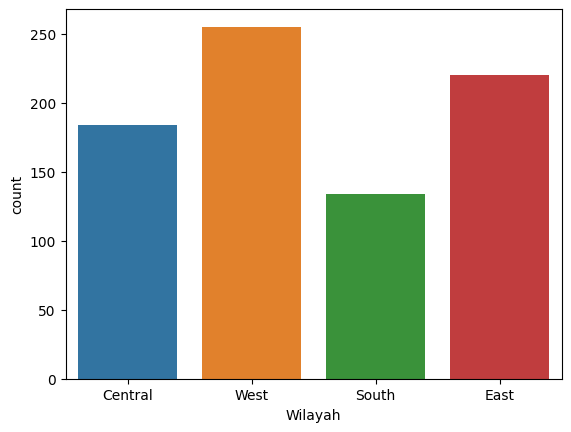

In [ ]:
#Melihat banyaknya yang beli dari setiap wilayah
sns.countplot(x=df1['Wilayah'], data= df1)

In [ ]:
#melihat berapa banyak pelanggan tiap cluster
t = dfscores.groupby(dfscores['Cluster']).count()['Index']
t.sort_values(ascending=False)

Cluster
0    455
1    226
2    112
Name: Index, dtype: int64

<Axes: xlabel='Cluster', ylabel='count'>

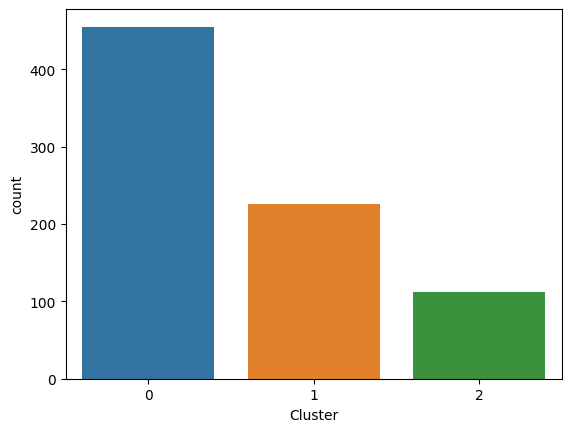

In [ ]:
sns.countplot(x=df1['Cluster'], data= df1)

In [ ]:
#melihat besaran cluster per wilayah
df1.groupby(['Wilayah','Cluster']).count()['Index']

Wilayah  Cluster
Central  0          100
         1           62
         2           22
East     0          125
         1           60
         2           35
South    0           78
         1           35
         2           21
West     0          152
         1           69
         2           34
Name: Index, dtype: int64

<Axes: xlabel='Wilayah', ylabel='count'>

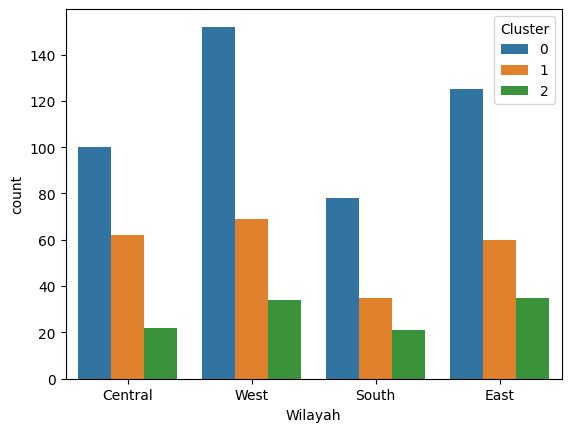

In [ ]:
sns.countplot(x=df1['Wilayah'], data= df1, hue=df1['Cluster'])

<Axes: xlabel='Segmen_pelanggan', ylabel='count'>

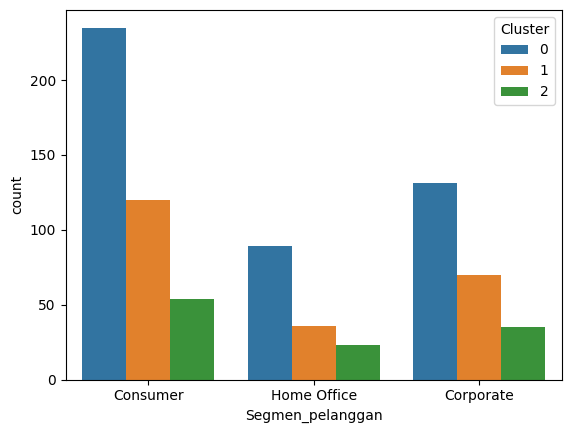

In [ ]:
#melihat besaran segmen pelanggan tiap cluster
sns.countplot(x=df1['Segmen_pelanggan'], data= df1, hue=df1['Cluster'])

<Axes: xlabel='count', ylabel='Negara'>

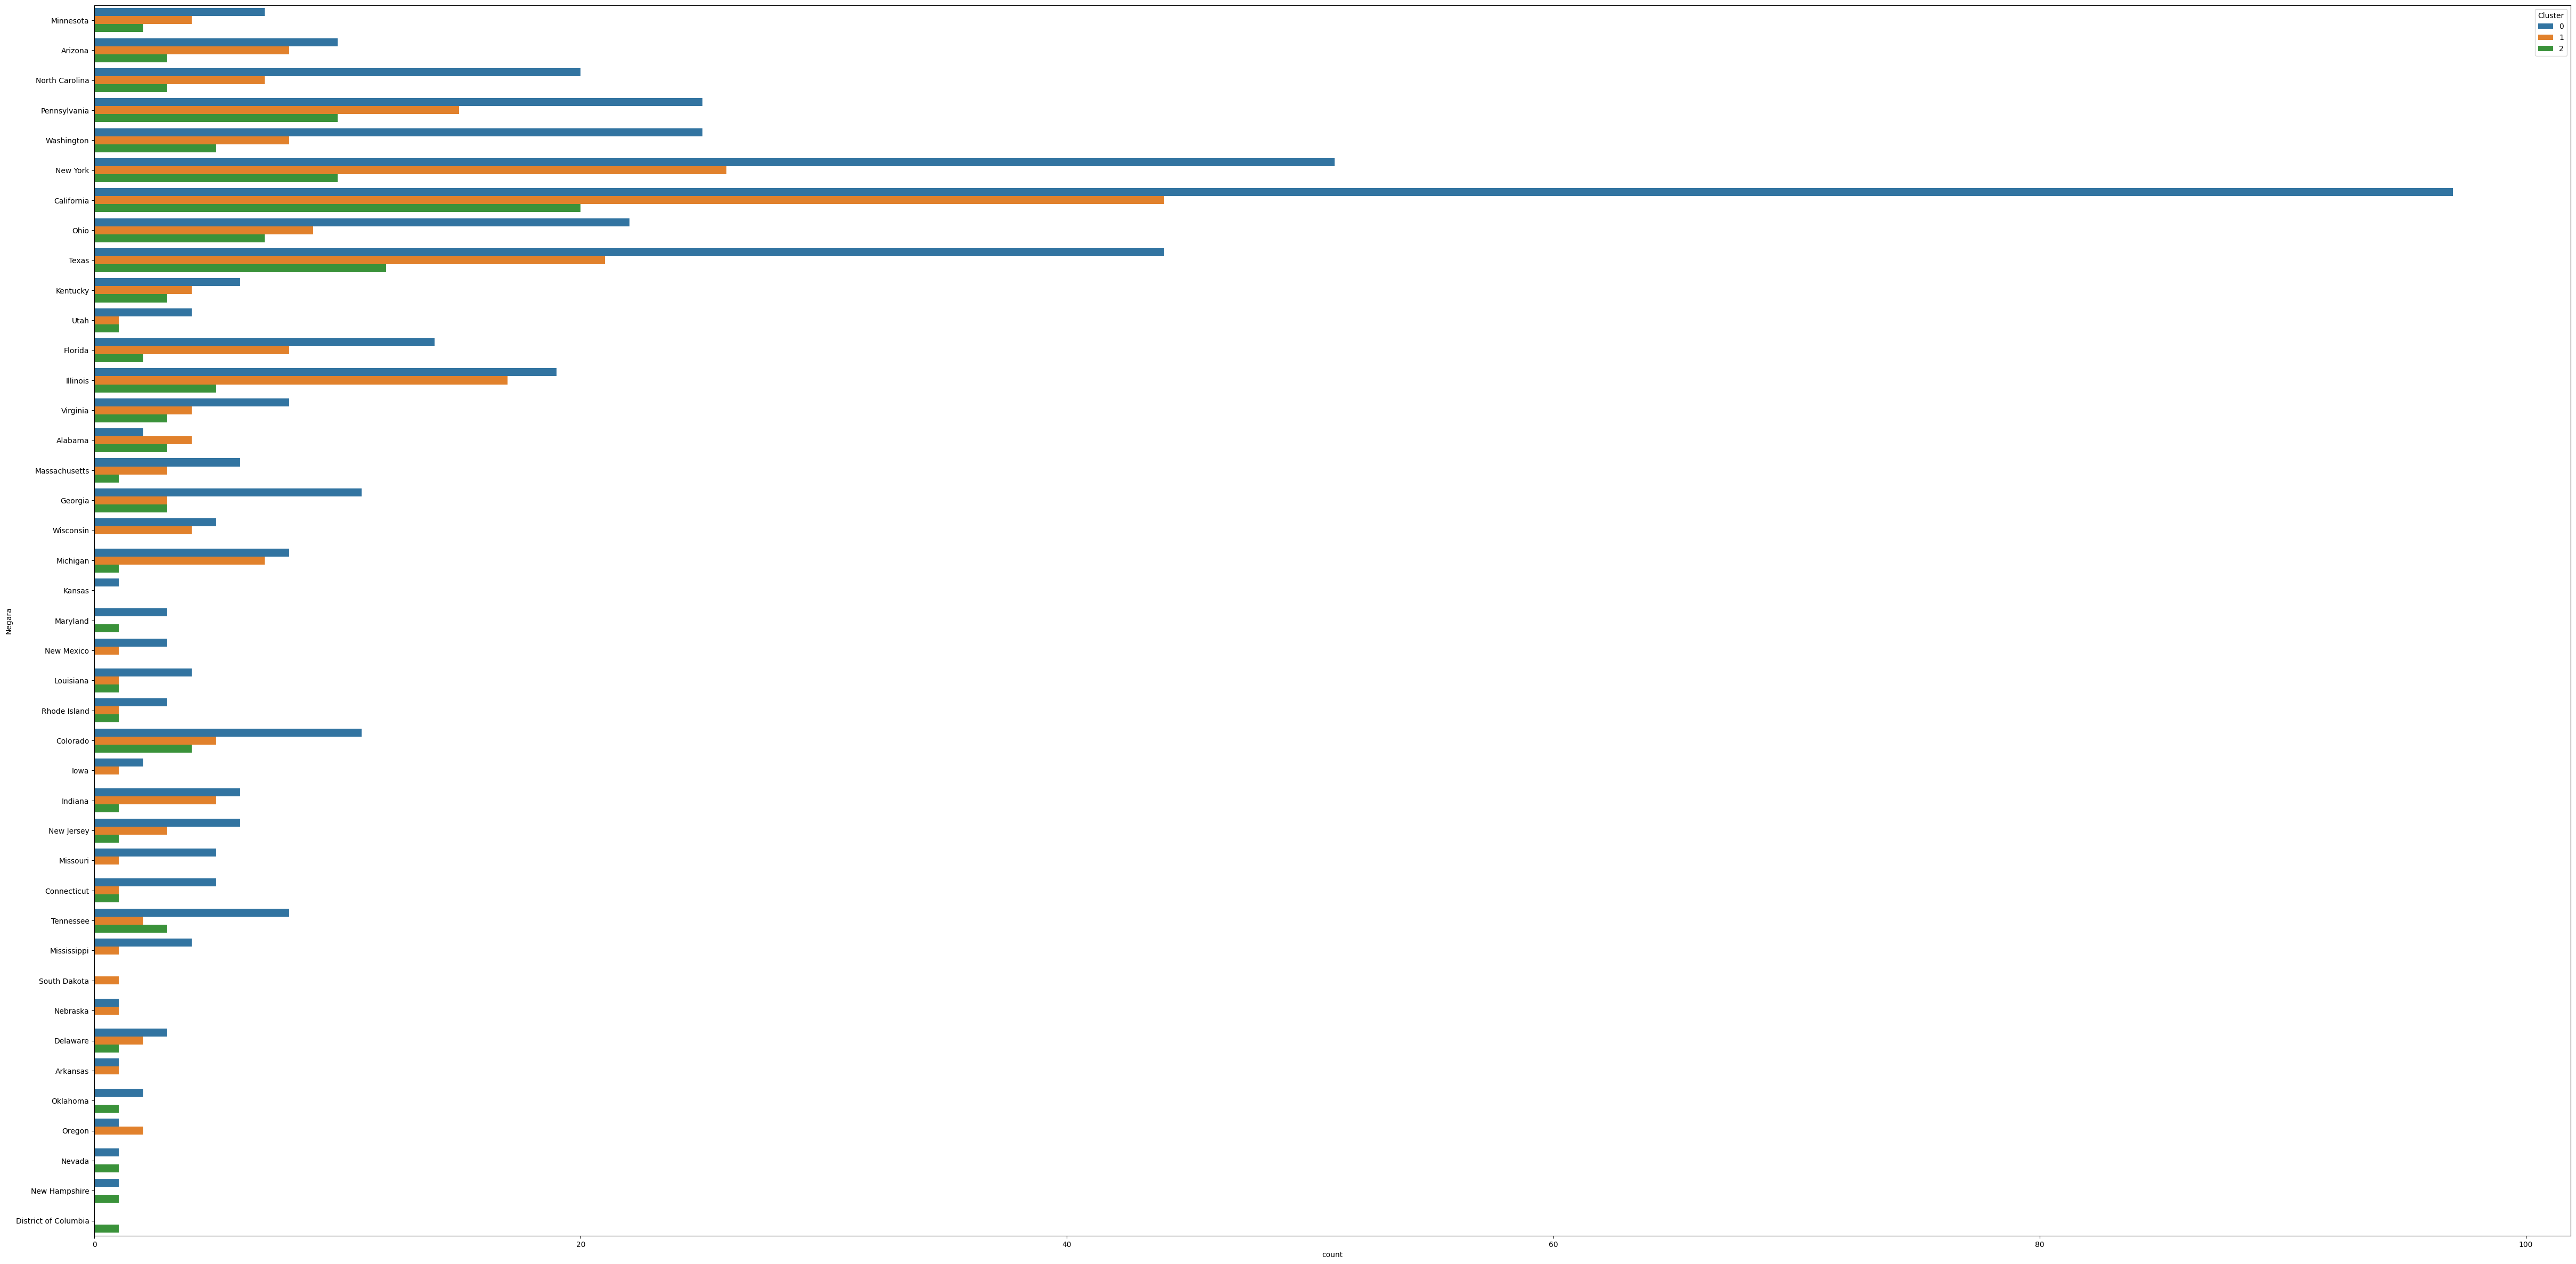

In [ ]:
#melihat besaran negara tiap cluster
plt.figure(figsize=(60,30))
sns.countplot(y=df1['Negara'], data= df1, hue=df1['Cluster'])

<Axes: xlabel='Score', ylabel='count'>

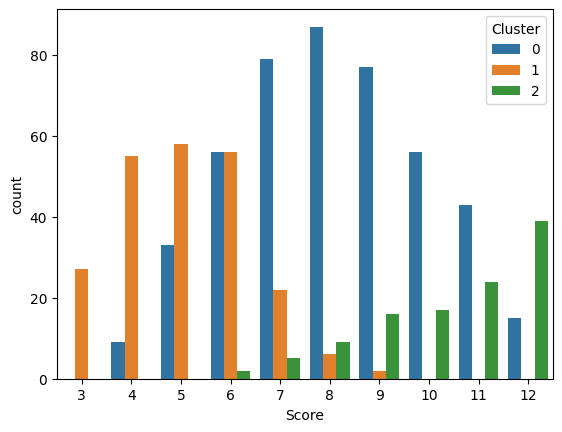

In [ ]:
#melihat besaran score tiap cluster
sns.countplot(x=df1['Score'], data= df1, hue=df1['Cluster'])

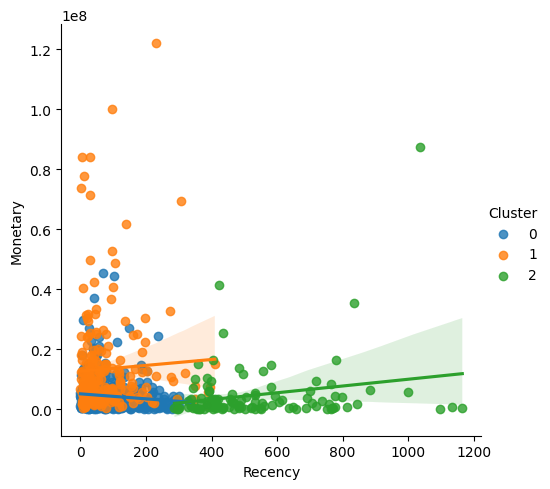

In [ ]:
#perbandingan Recency dengan monetary
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

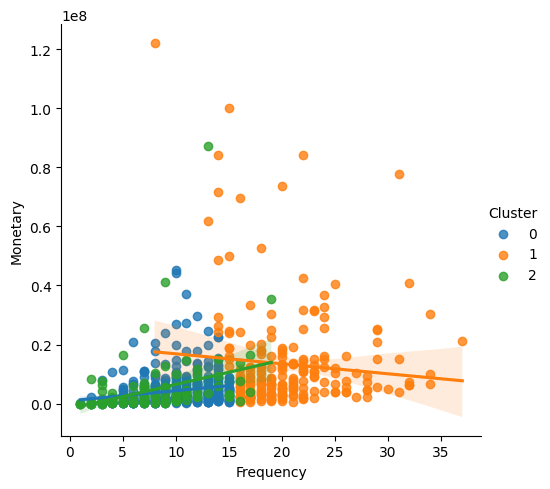

In [ ]:
#perbandingan frequency dengan monetary
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster')

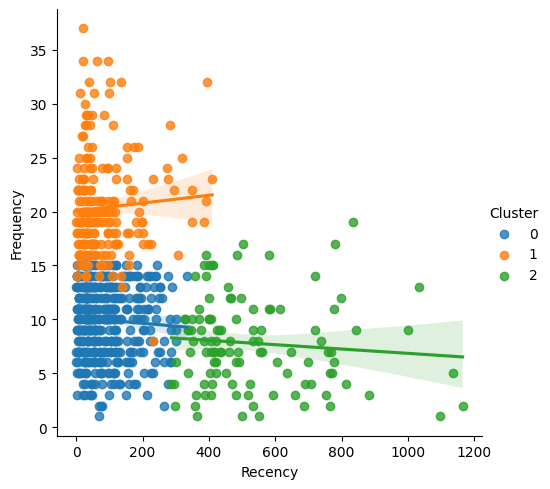

In [ ]:
#perbandingan Recency dengan frequency
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

In [ ]:
df2= RFMScores.copy()
df2.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
ID_pelanggan,,,,,,,,,
AA-10315,184,11,14599360.0,4,3,1,431,8,0
AA-10375,19,15,406386.0,1,2,4,124,7,0
AA-10480,259,12,591384.0,4,3,4,434,11,0
AA-10645,55,18,8064067.0,2,1,1,211,4,1
AB-10015,415,6,265012.0,4,4,4,444,12,2


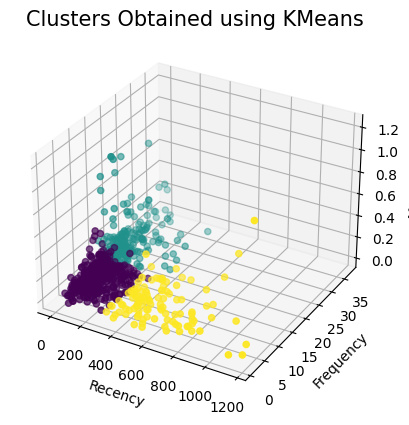

In [ ]:
#melihat hasil 3D persebaran cluster menggunakan kmeans
p=df2['Recency']
q=df2['Frequency']
r=df2['Monetary']

ax= plt.axes(projection='3d')

ax.scatter3D(p, q, r , c=df2['Cluster'])
plt.title('Clusters Obtained using KMeans',fontsize=15)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

keterangan :
*  cluster 0 = ungu
*  cluster 1 = hijau
*  cluster 2 = kuning

### KESIMPULAN/SARAN

Dari hasil analisis, diperoleh 3 cluster yaitu cluster 0, cluster 1, dan cluster 2. Jika dilihat, cluster 0 memiliki recency rendah dengan frequency rendah dan monetary juga lumayan rendah. Artinya, pelanggan kelompok ini akhir-akhir ini masih melakukan pembelian tetapi jarang melakukan transaksi sehingga uang yang dikeluarkan pelanggan rendah. Cluster 1 memiliki recency rendah dengan frequency paling tinggi dan monetary cenderung lebih tinggi. Artinya, pelanggan kelompok ini akhir-akhir ini masih melakukan transaksi dan sering melakukan transaksi sehingga uang yang dikeluarkan oleh pelanggan cenderung lebih tinggi. Sedangkan cluster 2, memiliki recency tinggi frequency rendah dan monetery rendah. Artinya, pelanggan kelompok ini sudah lama tidak melakukan transaksi dan jarang melakukan transaksi sehingga uang yang dikeluarkan tidak begitu banyak.

Sehingga, dapat dikatakan cluster 0 adalah pelanggan gold, cluster 1 pelanggan platinum dan cluster 2 pelanggan silver.

Maka dapat disimpulkan yang mendapatkan promo besar cluster 1, promo sedang cluster 0, promo kecil cluster 2